# Imports

In [49]:
import pandas as pd
import sqlite3

from datetime import datetime

import matplotlib.pylab as plt
import seaborn as sns

# Import Dataset

In [3]:
# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("../sncf_lostnfound.sqlite")
df = pd.read_sql_query("SELECT * from ObjetTrouve", con)

# Verify that result of SQL query is stored in the dataframe
print(df.head())

con.close()

   id          gare                        date  \
0   1  Lille Europe  2016-12-31 17:49:05.000000   
1   2  Lille Europe  2016-12-31 16:09:12.000000   
2   3  Lille Europe  2016-12-31 15:52:03.000000   
3   4  Lille Europe  2016-12-31 13:55:43.000000   
4   5  Lille Europe  2016-12-31 13:41:39.000000   

                                                type  \
0       Porte-monnaie / portefeuille, argent, titres   
1  Appareils électroniques, informatiques, appare...   
2           Pièces d'identités et papiers personnels   
3                Bagagerie: sacs, valises, cartables   
4                Bagagerie: sacs, valises, cartables   

                                     nature  
0                                  Chéquier  
1  Tablette tactile protégée (étui, housse)  
2                              Carte Vitale  
3                 Valise, sac sur roulettes  
4                                Sac à main  


In [4]:
df.head()

,id,gare,date,type,nature
0,1,Lille Europe,2016-12-31 17:49:05.000000,"Porte-monnaie / portefeuille, argent, titres",Chéquier
1,2,Lille Europe,2016-12-31 16:09:12.000000,"Appareils électroniques, informatiques, appare...","Tablette tactile protégée (étui, housse)"
2,3,Lille Europe,2016-12-31 15:52:03.000000,Pièces d'identités et papiers personnels,Carte Vitale
3,4,Lille Europe,2016-12-31 13:55:43.000000,"Bagagerie: sacs, valises, cartables","Valise, sac sur roulettes"
4,5,Lille Europe,2016-12-31 13:41:39.000000,"Bagagerie: sacs, valises, cartables",Sac à main


# Pre-processing / Data Engineering
## Date -->

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22200 entries, 0 to 22199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      22200 non-null  int64 
 1   gare    22200 non-null  object
 2   date    22200 non-null  object
 3   type    22200 non-null  object
 4   nature  22200 non-null  object
dtypes: int64(1), object(4)
memory usage: 867.3+ KB


In [16]:
type (df.date.iloc[0])

str

In [11]:
print (df.date.iloc[0])

2016-12-31 17:49:05.000000


In [20]:
print (df.date.iloc[0].split(".",)[0])

2016-12-31 17:49:05


In [21]:
datetime_object = datetime.strptime(df.date.iloc[0].split(".",)[0], '%Y-%m-%d %H:%M:%S')

In [22]:
datetime_object

datetime.datetime(2016, 12, 31, 17, 49, 5)

In [23]:
df['datetime_obj'] = pd.to_datetime(df['date'])

In [33]:
df.head()

,id,gare,date,type,nature,datetime_obj,year,month,day,day_of_week
0,1,Lille Europe,2016-12-31 17:49:05.000000,"Porte-monnaie / portefeuille, argent, titres",Chéquier,2016-12-31 17:49:05,2016,12,31,Saturday
1,2,Lille Europe,2016-12-31 16:09:12.000000,"Appareils électroniques, informatiques, appare...","Tablette tactile protégée (étui, housse)",2016-12-31 16:09:12,2016,12,31,Saturday
2,3,Lille Europe,2016-12-31 15:52:03.000000,Pièces d'identités et papiers personnels,Carte Vitale,2016-12-31 15:52:03,2016,12,31,Saturday
3,4,Lille Europe,2016-12-31 13:55:43.000000,"Bagagerie: sacs, valises, cartables","Valise, sac sur roulettes",2016-12-31 13:55:43,2016,12,31,Saturday
4,5,Lille Europe,2016-12-31 13:41:39.000000,"Bagagerie: sacs, valises, cartables",Sac à main,2016-12-31 13:41:39,2016,12,31,Saturday


In [157]:
df['year'] = pd.DatetimeIndex(df['datetime_obj']).year
df['month'] = pd.DatetimeIndex(df['datetime_obj']).month
df['month_name'] = pd.DatetimeIndex(df['datetime_obj']).month_name()
df['day'] = pd.DatetimeIndex(df['datetime_obj']).day
df['day_of_week'] = pd.DatetimeIndex(df['datetime_obj']).day_name()

df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str)


df['year_week'] = df['datetime_obj'].dt.strftime('%Y-%U')

In [158]:
df['year_week'].value_counts()

2018-35    130
2018-29    122
2018-05    120
2018-28    118
2018-12    115
          ... 
2020-11      8
2022-00      8
2019-52      6
2017-53      5
2021-00      2
Name: year_week, Length: 364, dtype: int64

In [35]:
df['type'].value_counts()

Bagagerie: sacs, valises, cartables                        6772
Appareils électroniques, informatiques, appareils photo    3493
Vêtements, chaussures                                      2597
Porte-monnaie / portefeuille, argent, titres               2537
Pièces d'identités et papiers personnels                   2492
Optique                                                    1139
Clés, porte-clés, badge magnétique                          995
Divers                                                      408
Livres, articles de papéterie                               402
Articles d'enfants, de puériculture                         318
Vélos, trottinettes, accessoires 2 roues                    296
Bijoux, montres                                             239
Parapluies                                                  205
Articles de sport, loisirs, camping                         168
Articles médicaux                                           103
Instruments de musique                  

<AxesSubplot: >

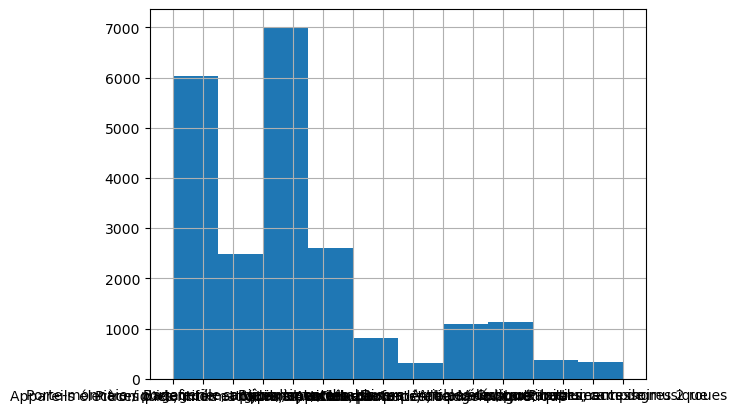

In [41]:
df['type'].hist()

Text(0.5, 1.0, 'Histogram missing object between 2016 to 2022')

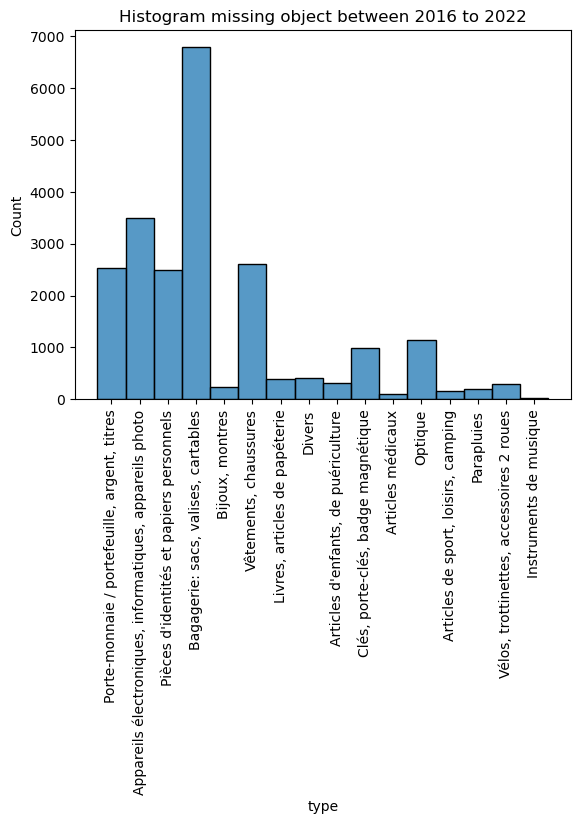

In [52]:
sns.histplot(data=df['type'])

plt.xticks(rotation = 90)
plt.title('Histogram missing object between 2016 to 2022')


In [65]:
df.head()

,id,gare,date,type,nature,datetime_obj,year,month,day,day_of_week
0,1,Lille Europe,2016-12-31 17:49:05.000000,"Porte-monnaie / portefeuille, argent, titres",Chéquier,2016-12-31 17:49:05,2016,December,31,Saturday
1,2,Lille Europe,2016-12-31 16:09:12.000000,"Appareils électroniques, informatiques, appare...","Tablette tactile protégée (étui, housse)",2016-12-31 16:09:12,2016,December,31,Saturday
2,3,Lille Europe,2016-12-31 15:52:03.000000,Pièces d'identités et papiers personnels,Carte Vitale,2016-12-31 15:52:03,2016,December,31,Saturday
3,4,Lille Europe,2016-12-31 13:55:43.000000,"Bagagerie: sacs, valises, cartables","Valise, sac sur roulettes",2016-12-31 13:55:43,2016,December,31,Saturday
4,5,Lille Europe,2016-12-31 13:41:39.000000,"Bagagerie: sacs, valises, cartables",Sac à main,2016-12-31 13:41:39,2016,December,31,Saturday


In [73]:
df.groupby(by = ['month', 'type'])['type'].count()

month  type                                                   
1      Appareils électroniques, informatiques, appareils photo    283
       Articles d'enfants, de puériculture                         27
       Articles de sport, loisirs, camping                          9
       Articles médicaux                                            8
       Bagagerie: sacs, valises, cartables                        571
                                                                 ... 
12     Parapluies                                                  21
       Pièces d'identités et papiers personnels                   203
       Porte-monnaie / portefeuille, argent, titres               186
       Vélos, trottinettes, accessoires 2 roues                    16
       Vêtements, chaussures                                      150
Name: type, Length: 191, dtype: int64

In [115]:
df_month_mean = df.groupby(by = ['month'])['month'].count().reset_index(name='mean')

In [116]:
df_month_mean

,month,mean
0,1,1833
1,2,1740
2,3,1690
3,4,1543
4,5,1701
5,6,1992
6,7,2121
7,8,1870
8,9,2113
9,10,2103


In [117]:
df_month_mean['mean'] = df_month_mean['mean']/df_month_mean['mean'].sum()*100

In [118]:
df_month_mean

,month,mean
0,1,8.256757
1,2,7.837838
2,3,7.612613
3,4,6.950450
4,5,7.662162
5,6,8.972973
6,7,9.554054
7,8,8.423423
8,9,9.518018
9,10,9.472973


Text(0.5, 1.0, 'Average of the number of missing objects by month')

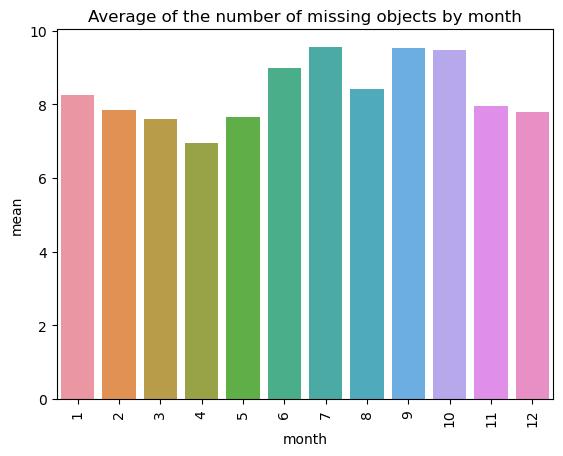

In [120]:
sns.barplot(data=df_month_mean,x='month',y='mean')

plt.xticks(rotation = 90)
plt.title('Average of the number of missing objects by month')

df_month_mean = df.groupby(by = ['month'])['month'].count().reset_index(name='mean')

Text(0.5, 1.0, 'Average of the number of missing objects by day_of_week')

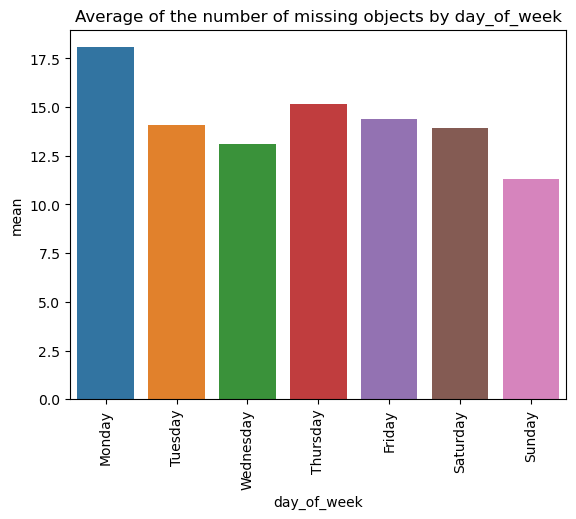

In [125]:
df_day_of_week_mean = df.groupby(by = ['day_of_week'])['day_of_week'].count().reset_index(name='mean')
df_day_of_week_mean['mean'] = df_day_of_week_mean['mean']/df_day_of_week_mean['mean'].sum()*100

order_of_the_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.barplot(data=df_day_of_week_mean,x='day_of_week',y='mean',order=order_of_the_week)

plt.xticks(rotation = 90)
plt.title('Average of the number of missing objects by day_of_week')

Text(0.5, 1.0, 'Histogram missing object between 2016 to 2022')

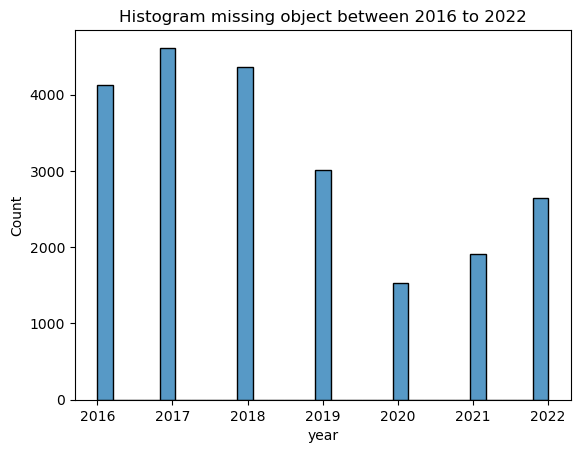

In [126]:
# Sum of lost objects by years
sns.histplot(data=df['year'])

# plt.xticks(rotation = 90)
plt.title('Sum of missing objects between 2016 to 2022')

In [147]:
df['year_month'] = pd.to_datetime(df['year_month'])

In [151]:
df['year_month'].value_counts()

2018-07-01    467
2018-09-01    441
2017-10-01    434
2017-09-01    426
2017-06-01    426
             ... 
2021-02-01    110
2020-03-01     93
2021-04-01     83
2020-05-01     52
2020-11-01     51
Name: year_month, Length: 83, dtype: int64

Text(0.5, 1.0, 'Sum of missing objects between 2016 to 2022')

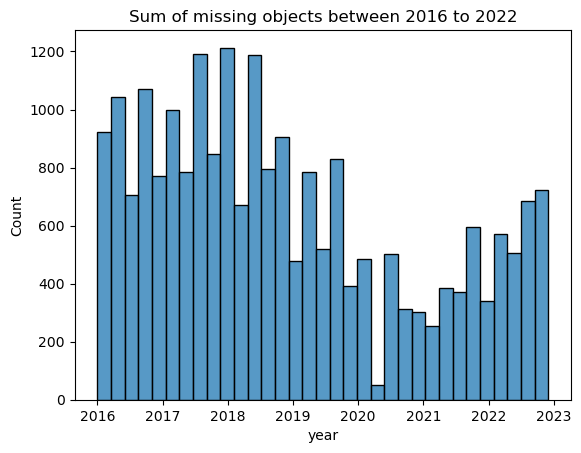

In [153]:
# Sum of lost objects by months
import matplotlib.ticker as ticker

sns.histplot(data=df['year_month'])

# plt.xticks(rotation = 90)
plt.xlabel('year')
plt.title('Sum of missing objects between 2016 to 2022')

Text(0.5, 1.0, 'Sum of missing objects between 2016 to 2022')

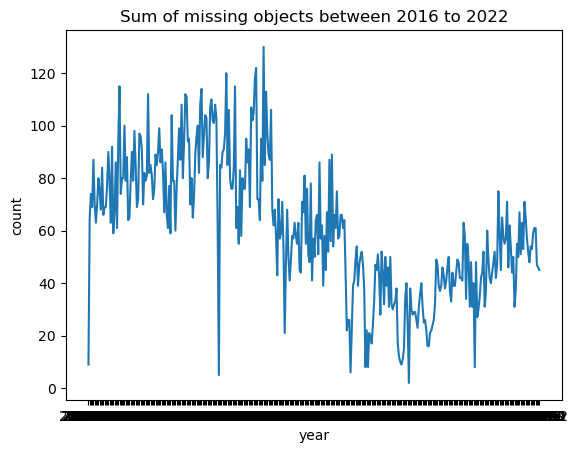

In [163]:
# Sum of lost objects by weeks

df_week_sum = df.groupby(by = ['year_week'])['year_week'].count().reset_index(name='count')


# Visualisation
sns.lineplot(data=df_week_sum, x='year_week',y='count')

# plt.xticks(rotation = 90)
plt.xlabel('year')
plt.title('Sum of missing objects between 2016 to 2022')